#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#### Data Set

In [2]:
data=pd.read_excel("sample-data/mavoix_ml_sample_dataset.xlsx")

In [3]:
data_copy = data.copy()

In [4]:
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 24 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
Unnamed: 10                   0 non-null float64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  378 non-null object
Degree                        380 non-null object
Stream   

In [6]:
data.isnull().sum()

Application_ID                  0
Current City                    0
Python (out of 3)               0
R Programming (out of 3)        0
Deep Learning (out of 3)        0
PHP (out of 3)                  0
MySQL (out of 3)                0
HTML (out of 3)                 0
CSS (out of 3)                  0
JavaScript (out of 3)           0
Unnamed: 10                   392
AJAX (out of 3)                 0
Bootstrap (out of 3)            0
MongoDB (out of 3)              0
Node.js (out of 3)              0
ReactJS (out of 3)              0
Other skills                   14
Degree                         12
Stream                         18
Current Year Of Graduation      0
Performance_PG                289
Performance_UG                 54
Performance_12                163
Performance_10                177
dtype: int64

#### Data Cleaning

In [7]:
data.drop(['Application_ID','Unnamed: 10','Performance_PG','Performance_12','Performance_10'],inplace=True,axis=1)

In [8]:
data.head()

,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_UG
0,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN
1,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,85.50/100
2,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,70.00/100
3,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,6.86/10
4,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,6.38/10


In [9]:
data.columns = ['Current_City','Python_SkillScr','R_SkillScr','Deep_SkillScr','PHP_SkillScr',
               'MySQL_SkillScr','HTML_SkillScr','CSS_Skill','JS_SkillScr','AJAX_SkillScr','Bootstrap_SkillScr',
               'MongoDB_SkillScr','Node.js_SkillScr','ReactJS_SkillScr','Other_Skills','Degree','Stream',
                'YearOfGrad','Perform_UG']

In [10]:
data.head()

,Current_City,Python_SkillScr,R_SkillScr,Deep_SkillScr,PHP_SkillScr,MySQL_SkillScr,HTML_SkillScr,CSS_Skill,JS_SkillScr,AJAX_SkillScr,Bootstrap_SkillScr,MongoDB_SkillScr,Node.js_SkillScr,ReactJS_SkillScr,Other_Skills,Degree,Stream,YearOfGrad,Perform_UG
0,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN
1,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,85.50/100
2,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,70.00/100
3,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,6.86/10
4,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,6.38/10


In [11]:
data['Other_Skills'] = data['Other_Skills'].str.split(', ')

In [12]:
data['Other_Skills'].fillna('None',inplace=True)

In [13]:
skills = []

In [14]:
for i in range(len(data)):
    if data['Other_Skills'][i] != 'None':
        skills=skills + data['Other_Skills'][i]
        

In [15]:
import collections
skill_freq = collections.Counter(skills)

In [16]:
skill_freq

Counter({'R Programming': 71,
         'Data Science': 22,
         'Machine Learning': 168,
         'Neural Networks': 20,
         'Python': 287,
         'Android': 79,
         'Algorithms': 35,
         'Data Structures': 71,
         'C Programming': 155,
         'C#.NET': 9,
         'C++ Programming': 116,
         'Data Analytics': 92,
         'Java': 170,
         'Mathematics': 11,
         'MongoDB': 13,
         'Natural Language Processing (NLP)': 35,
         'PostgreSQL': 3,
         'SQL': 106,
         'Statistical Modeling': 33,
         'Amazon Web Services (AWS)': 10,
         'Deep Learning': 60,
         'CSS': 116,
         'Embedded Systems': 11,
         'HTML': 151,
         'Arduino': 10,
         'OpenCV': 16,
         'Django': 22,
         'REST API': 4,
         'MySQL': 66,
         'MS-Word': 28,
         'Robotics': 3,
         '.NET': 13,
         'ASP.NET': 11,
         'C#': 9,
         'MS SQL Server': 7,
         'English Proficiency (Spoken)'

In [17]:
skill_freq=sorted(skill_freq.items(),key= lambda v:v[1],reverse=True)

In [18]:
skill_freq

[('Python', 287),
 ('Java', 170),
 ('Machine Learning', 168),
 ('C Programming', 155),
 ('HTML', 151),
 ('C++ Programming', 116),
 ('CSS', 116),
 ('SQL', 106),
 ('JavaScript', 94),
 ('Data Analytics', 92),
 ('MS-Excel', 81),
 ('Android', 79),
 ('R Programming', 71),
 ('Data Structures', 71),
 ('PHP', 69),
 ('MySQL', 66),
 ('Deep Learning', 60),
 ('MS-Office', 51),
 ('Database Management System (DBMS)', 46),
 ('Algorithms', 35),
 ('Natural Language Processing (NLP)', 35),
 ('Statistical Modeling', 33),
 ('English Proficiency (Spoken)', 31),
 ('MS-PowerPoint', 29),
 ('MS-Word', 28),
 ('Bootstrap', 25),
 ('Linux', 23),
 ('Data Science', 22),
 ('Django', 22),
 ('Neural Networks', 20),
 ('Computer Vision', 20),
 ('Adobe Photoshop', 18),
 ('Image Processing', 17),
 ('Artifical Intelligence', 17),
 ('OpenCV', 16),
 ('MATLAB', 15),
 ('English Proficiency (Written)', 14),
 ('jQuery', 14),
 ('MongoDB', 13),
 ('.NET', 13),
 ('Software Testing', 13),
 ('BIG DATA ANALYTICS', 12),
 ('WordPress', 12)

In [19]:
most_common_skills = []
for i in range(0,16):
    most_common_skills.append(skill_freq[i][0])

In [20]:
most_common_skills

['Python',
 'Java',
 'Machine Learning',
 'C Programming',
 'HTML',
 'C++ Programming',
 'CSS',
 'SQL',
 'JavaScript',
 'Data Analytics',
 'MS-Excel',
 'Android',
 'R Programming',
 'Data Structures',
 'PHP',
 'MySQL']

In [21]:
for col in most_common_skills:
    data[col] = [1 if (col in data['Other_Skills'][i]) or data['Other_Skills'][i] == 'None' else 0 for i in range(len(data))]

In [22]:
data.head()

,Current_City,Python_SkillScr,R_SkillScr,Deep_SkillScr,PHP_SkillScr,MySQL_SkillScr,HTML_SkillScr,CSS_Skill,JS_SkillScr,AJAX_SkillScr,...,CSS,SQL,JavaScript,Data Analytics,MS-Excel,Android,R Programming,Data Structures,PHP,MySQL
0,Bangalore,0,2,0,2,0,2,3,2,0,...,0,0,0,0,0,0,1,0,0,0
1,Bangalore,2,0,0,2,2,2,2,2,0,...,0,0,0,0,0,1,0,0,0,0
2,Bangalore,3,0,1,2,2,2,0,2,0,...,0,1,0,1,0,0,0,1,0,0
3,Bangalore,2,0,2,1,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Bangalore,2,0,0,2,0,2,1,1,0,...,1,1,0,0,0,0,0,0,0,0


In [23]:
data.drop('Other_Skills',inplace=True,axis=1)

In [24]:
data.columns

Index(['Current_City', 'Python_SkillScr', 'R_SkillScr', 'Deep_SkillScr',
       'PHP_SkillScr', 'MySQL_SkillScr', 'HTML_SkillScr', 'CSS_Skill',
       'JS_SkillScr', 'AJAX_SkillScr', 'Bootstrap_SkillScr',
       'MongoDB_SkillScr', 'Node.js_SkillScr', 'ReactJS_SkillScr', 'Degree',
       'Stream', 'YearOfGrad', 'Perform_UG', 'Python', 'Java',
       'Machine Learning', 'C Programming', 'HTML', 'C++ Programming', 'CSS',
       'SQL', 'JavaScript', 'Data Analytics', 'MS-Excel', 'Android',
       'R Programming', 'Data Structures', 'PHP', 'MySQL'],
      dtype='object')

In [25]:
data['Perform_UG'] = data['Perform_UG'].apply(lambda x:eval(x) if(pd.notnull(x)) else x)

In [26]:
data.isnull().sum()

Current_City           0
Python_SkillScr        0
R_SkillScr             0
Deep_SkillScr          0
PHP_SkillScr           0
MySQL_SkillScr         0
HTML_SkillScr          0
CSS_Skill              0
JS_SkillScr            0
AJAX_SkillScr          0
Bootstrap_SkillScr     0
MongoDB_SkillScr       0
Node.js_SkillScr       0
ReactJS_SkillScr       0
Degree                12
Stream                18
YearOfGrad             0
Perform_UG            54
Python                 0
Java                   0
Machine Learning       0
C Programming          0
HTML                   0
C++ Programming        0
CSS                    0
SQL                    0
JavaScript             0
Data Analytics         0
MS-Excel               0
Android                0
R Programming          0
Data Structures        0
PHP                    0
MySQL                  0
dtype: int64

In [27]:
data['Degree'].fillna(data['Degree'].mode()[0],inplace=True)
data['Stream'].fillna(data['Stream'].mode()[0],inplace=True)
data['Perform_UG'].fillna(data['Perform_UG'].mean(),inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 34 columns):
Current_City          392 non-null object
Python_SkillScr       392 non-null int64
R_SkillScr            392 non-null int64
Deep_SkillScr         392 non-null int64
PHP_SkillScr          392 non-null int64
MySQL_SkillScr        392 non-null int64
HTML_SkillScr         392 non-null int64
CSS_Skill             392 non-null int64
JS_SkillScr           392 non-null int64
AJAX_SkillScr         392 non-null int64
Bootstrap_SkillScr    392 non-null int64
MongoDB_SkillScr      392 non-null int64
Node.js_SkillScr      392 non-null int64
ReactJS_SkillScr      392 non-null int64
Degree                392 non-null object
Stream                392 non-null object
YearOfGrad            392 non-null int64
Perform_UG            392 non-null float64
Python                392 non-null int64
Java                  392 non-null int64
Machine Learning      392 non-null int64
C Programming         392 non

In [29]:
City_Dummy = pd.get_dummies(data['Current_City'],drop_first=True)
Degree_Dummy = pd.get_dummies(data['Degree'],drop_first=True)
Stream_Dummy = pd.get_dummies(data['Stream'],drop_first=True)
YearOfGrad_Dummy = pd.get_dummies(data['YearOfGrad'],prefix='GradYear',drop_first=True)

In [30]:
data = pd.concat([data,City_Dummy,Degree_Dummy,Stream_Dummy,YearOfGrad_Dummy],sort=False,axis=1)

In [31]:
data.isnull().sum().sum()

0

In [32]:
data.head()

,Current_City,Python_SkillScr,R_SkillScr,Deep_SkillScr,PHP_SkillScr,MySQL_SkillScr,HTML_SkillScr,CSS_Skill,JS_SkillScr,AJAX_SkillScr,...,GradYear_2014,GradYear_2015,GradYear_2016,GradYear_2017,GradYear_2018,GradYear_2019,GradYear_2020,GradYear_2021,GradYear_2022,GradYear_2023
0,Bangalore,0,2,0,2,0,2,3,2,0,...,0,0,0,1,0,0,0,0,0,0
1,Bangalore,2,0,0,2,2,2,2,2,0,...,0,0,0,0,0,1,0,0,0,0
2,Bangalore,3,0,1,2,2,2,0,2,0,...,0,0,0,0,1,0,0,0,0,0
3,Bangalore,2,0,2,1,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Bangalore,2,0,0,2,0,2,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
data.drop(['Current_City','Degree','Stream','YearOfGrad'],inplace=True,axis=1)

In [34]:
data.head()

,Python_SkillScr,R_SkillScr,Deep_SkillScr,PHP_SkillScr,MySQL_SkillScr,HTML_SkillScr,CSS_Skill,JS_SkillScr,AJAX_SkillScr,Bootstrap_SkillScr,...,GradYear_2014,GradYear_2015,GradYear_2016,GradYear_2017,GradYear_2018,GradYear_2019,GradYear_2020,GradYear_2021,GradYear_2022,GradYear_2023
0,0,2,0,2,0,2,3,2,0,2,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,2,2,2,2,2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,0,1,2,2,2,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,0,2,1,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,2,0,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
X=data.values

In [36]:
X

array([[0., 2., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 2., 0., ..., 0., 0., 0.],
       [2., 3., 0., ..., 0., 0., 0.]])

#### K-Mean Clustering

In [37]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [38]:
y_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,

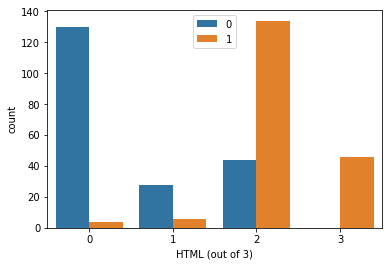

In [47]:
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline
sns.countplot(data_copy.iloc[:,7],hue=y_kmeans)

In [39]:
data_copy.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [50]:
data_copy['Potential_Candidate'] = y_kmeans

In [51]:
data_copy.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,Potential_Candidate
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN,1
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60,1
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60,1
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32,0
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80,1


In [53]:
data_copy['Potential_Candidate'] = data_copy['Potential_Candidate'].map({1 : 'Potential',
                                                               0 : 'Not Potential'})

In [55]:
data_copy.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,Potential_Candidate
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN,Potential
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60,Potential
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60,Potential
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32,Not Potential
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80,Potential


#### Result Submission

In [56]:
pd.DataFrame({'Application_ID':data_copy.Application_ID,'Potential_Candidate':data_copy.Potential_Candidate}).set_index('Application_ID').to_csv('Submission.csv')